### Ejercicio 2 -TP2 CONTROL 2024

Los valores característicos de esta respuesta obtenidos a partir de "step_info"son: RiseTime: 1.26; SettlingTime: 14.13; SettlingMin: 48.15; SettlingMax: 86.6; Overshoot: 44.41%; Undershoot: 0.0; Peak: 86.66; PeakTime: 3.25; SteadyStateValue: 60.

In [49]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import pandas as pd

fuente = {'family': 'fantasy',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        } 


In [34]:
RT = 1.26
ST = 14.13 
SMin = 48.15
SMax = 86.6 
over = 44.41
PEAK = 86.66 
SSV = 60
mp=28.8
PEAK_T = 3.25



In [39]:
wn = 
wn 

1.4285714285714286

In [ ]:
sigma = 14.13*4.6
sigma 

In [38]:
wd = np.pi / PEAK_T
wd

0.966643893412244

In [42]:
wn = wd / np.sqrt(1 - 0.25**2)
wn

np.float64(0.9983455202396582)

np.float64(0.18263654231219997)

In [67]:
H = ct.tf([wn],[1,0.25*2*wn,wn**2])
H

TransferFunction(array([0.99834552]), array([1.        , 0.49917276, 0.99669378]))

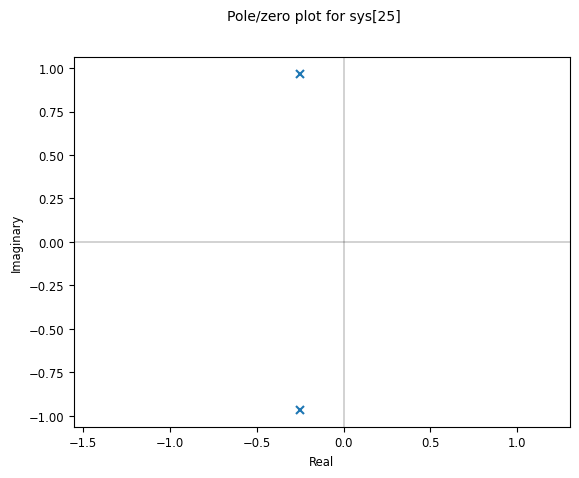

In [60]:
ct.pzmap(H)

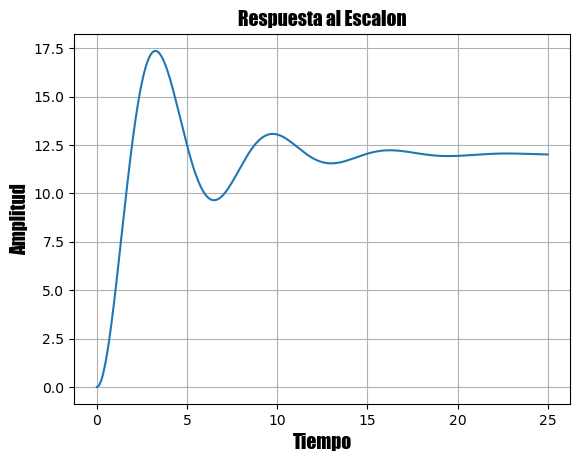

In [63]:
T = np.linspace(0,25,1001)
t,y = ct.step_response(H*12,T)

plt.plot(t,y)
plt.title('Respuesta al Escalon', fontdict=fuente)
plt.xlabel('Tiempo', fuente)
plt.ylabel('Amplitud', fontdict=fuente)
plt.grid()

In [64]:
info = ct.step_info(H) 

#####################De aca para abajo es solo para armar una tabla mas legible##############################

df_info = pd.DataFrame(list(info.items()), columns=['Propiedad', 'Valor'])

styled_df_info = df_info.style.set_caption("Información de Respuesta al Escalón de H(s)")\
    .set_table_styles([{
        'selector': 'caption',
        'props': [('font-size', '16pt'), ('font-weight', 'bold'), ('color', '#ffffff'), ('background-color', '#333333'), ('padding', '10px')]
    }, {
        'selector': 'thead',
        'props': [('font-weight', 'bold'), ('background-color', '#333333'), ('color', '#ffffff'), ('text-align', 'center'), ('border', '1px solid #ffffff')]
    }, {
        'selector': 'thead th',
        'props': [('text-align', 'center'), ('border', '1px solid #ffffff')]
    }, {
        'selector': 'tr:nth-child(even)',
        'props': [('background-color', '#444444'), ('color', '#ffffff'), ('text-align', 'center'), ('border', '1px solid #ffffff')]
    }, {
        'selector': 'tr:nth-child(odd)',
        'props': [('background-color', '#555555'), ('color', '#ffffff'), ('text-align', 'center'), ('border', '1px solid #ffffff')]
    }, {
        'selector': 'td',
        'props': [('text-align', 'center'), ('border', '1px solid #ffffff')]
    }])\
    .set_properties(**{'font-size': '12pt'})
    
styled_df_info

,Propiedad,Valor
0,RiseTime,1.258037
1,SettlingTime,14.341621
2,SettlingMin,0.804059
3,SettlingMax,1.446641
4,Overshoot,44.424788
5,Undershoot,0.000000
6,Peak,1.446641
7,PeakTime,3.270896
8,SteadyStateValue,1.001657
